In [29]:
# !pip install seaborn

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation

#### Energy Production

In [47]:
df_production = pd.read_csv('Global_Energy_Consumption_Renewable_Generation/Electricity_Production_By_Source.csv')
df_production.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Total Energy
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0,0.467
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0,0.592
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0,0.687
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0,0.939
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0,0.894


In [48]:
# drop unused columns

list_features = ['Entity', 'Code', 'Electricity from coal (TWh)','Electricity from gas (TWh)', 
                   'Electricity from hydro (TWh)', 'Electricity from other renewables (TWh)', 
                   'Electricity from solar (TWh)', 'Electricity from oil (TWh)', 'Electricity from wind (TWh)', 
                   'Electricity from nuclear (TWh)']
df_production = df_production.drop(columns = list_features)
df_production.head()

,Year,Total Energy
0,2000,0.467
1,2001,0.592
2,2002,0.687
3,2003,0.939
4,2004,0.894


In [49]:
# Sum the values row-wise for the same year
# Because the values in the same years are for different countries so we need to sum them to get the total value for that year 
df_production = df_production.groupby('Year')['Total Energy'].sum().reset_index()
df_production

,Year,Total Energy
0,1985,29349.338969
1,1986,30230.565925
2,1987,31698.007046
3,1988,33079.933454
4,1989,34615.592699
5,1990,35514.730790
6,1991,36297.181743
7,1992,36610.987675
8,1993,37381.939776
9,1994,38350.227972


#### Energy Consumption

In [50]:
df_consumption = pd.read_csv('Global_Energy_Consumption_Renewable_Generation/Continent_Consumption_TWH.csv')
df_consumption.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [51]:
# drop unused columns

list_continents = ['OECD', 'BRICS', 'Europe', 'North America', 'Latin America', 
                   'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS']
df_consumption = df_consumption.drop(columns = list_continents)
df_consumption.head()

,Year,World
0,1990,101855.54
1,1991,102483.56
2,1992,102588.23
3,1993,103646.56
4,1994,104449.03


In [52]:
df_renew_gen = pd.read_csv('Global_Energy_Consumption_Renewable_Generation/renewablePowerGeneration97-17.csv')
df_renew_gen.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


In [53]:
# calculate the sum of renewable energy for each year

list_renewables = ['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']
df_renew_gen['Total_Renewables (TWh)'] = df_renew_gen[list_renewables].sum(axis=1)
df_renew_gen = df_renew_gen.drop(columns = list_renewables)
df_renew_gen.head()

,Year,Total_Renewables (TWh)
0,1990,2232.06
1,1991,2310.31
2,1992,2311.21
3,1993,2443.66
4,1994,2468.26


#### Merge energy production and energy consumption into 1 dataframe

In [59]:
df_merged = pd.merge(df_production, df_consumption, on='Year')

df_merged = pd.merge(df_merged, df_renew_gen, on='Year') 

In [60]:
df_merged

,Year,Total Energy,World,Total_Renewables (TWh)
0,1990,35514.730790,101855.54,2232.06
1,1991,36297.181743,102483.56,2310.31
2,1992,36610.987675,102588.23,2311.21
3,1993,37381.939776,103646.56,2443.66
4,1994,38350.227972,104449.03,2468.26
5,1995,39677.728037,107112.30,2593.99
6,1996,40912.238387,109763.94,2635.03
7,1997,41874.490445,110903.68,2669.27
8,1998,42970.152258,111450.29,2690.40
9,1999,44196.034785,113974.00,2707.05


In [63]:
# Rename columns
df_merged = df_merged.rename(columns = {'Total Energy': 'Production (TWh)', 'World': 'Consumption (TWh)', 
                                        'Total_Renewables (TWh)': 'Renewable (TWh)'})
df_merged.head()

,Year,Production (TWh),Consumption (TWh),Renewable (TWh)
0,1990,35514.730790,101855.54,2232.06
1,1991,36297.181743,102483.56,2310.31
2,1992,36610.987675,102588.23,2311.21
3,1993,37381.939776,103646.56,2443.66
4,1994,38350.227972,104449.03,2468.26


## Correlation between energy production & consumption

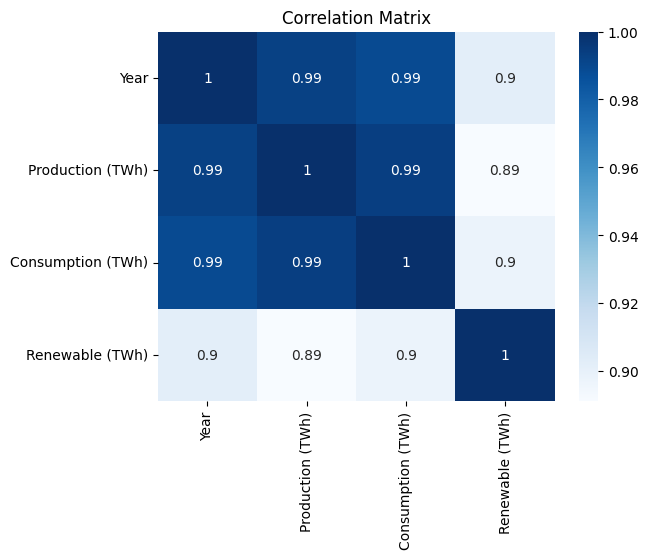

In [64]:
# Calculate the correlation matrix
corr_matrix = df_merged.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()